In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_excel('/content/drive/MyDrive/data/vent1_update.xlsx', header=None)

In [ ]:
column_names=df.iloc[1]
df.columns=column_names
df=df.iloc[1:].reset_index(drop=True)
df=df.iloc[2:].reset_index(drop=True)
nan_col=df.columns[df.columns.astype(str).str.contains('nan',case=False,na=False)]
df.drop(columns=nan_col,inplace=True)

In [ ]:
df.head()

1,DateTime,Sl_no,CurePressNo,FertCode,FertName,CuringCode,ModelName,PrVent1,RelPrVent1,VentGap1,...,RelPrVent28,VentGap28,PrVent29,RelPrVent29,VentGap29,PrVent30,RelPrVent30,VentGap30,cyclecount,LNGDate
0,2023-09-25 10:38:20.657000,15181774,3,B413010150,29326062- SA02B - YOM DOM PLAIN B413010150,,YOM DOM PLA,152.3,4.5,2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,2023-09-25 00:00:00
1,2023-09-25 11:45:52.520000,15181994,3,B413010150,29326062- SA02B - YOM DOM PLAIN B413010150,,YOM DOM PLA,150.3,4.3,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,2023-09-25 00:00:00
2,2023-09-25 12:11:55.850000,15182160,3,B413010150,29326062- SA02B - YOM DOM PLAIN B413010150,,YOM DOM PLA,152.1,4.1,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,2023-09-25 00:00:00
3,2023-09-25 14:41:46.177000,15182707,3,B413010150,29326062- SA02B - YOM DOM PLAIN B413010150,,YOM DOM PLA,152.8,3.3,2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,2023-09-25 00:00:00
4,2023-09-25 18:21:47.273000,15183953,3,B413010150,29326062- SA02B - YOM DOM PLAIN B413010150,,YOM DOM PLA,153.2,3.6,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,2023-09-25 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71786 entries, 0 to 71785
Data columns (total 99 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DateTime     71786 non-null  object
 1   Sl_no        71786 non-null  object
 2   CurePressNo  71786 non-null  object
 3   FertCode     71754 non-null  object
 4   FertName     64871 non-null  object
 5   CuringCode   67136 non-null  object
 6   ModelName    64871 non-null  object
 7   PrVent1      71786 non-null  object
 8   RelPrVent1   71786 non-null  object
 9   VentGap1     71786 non-null  object
 10  PrVent2      71786 non-null  object
 11  RelPrVent2   71786 non-null  object
 12  VentGap2     71786 non-null  object
 13  PrVent3      71786 non-null  object
 14  RelPrVent3   71786 non-null  object
 15  VentGap3     71786 non-null  object
 16  PrVent4      71786 non-null  object
 17  RelPrVent4   71786 non-null  object
 18  VentGap4     71786 non-null  object
 19  PrVent5      71786 non-nu

In [ ]:
df['FertCode'].unique()



array(['B413010150', 'B412010018', 'B413010025', 'B413010154',
       'B413010053', 'B413010152', 'B413010033', ' ', nan, 'B413010070',
       'B413010106', 'B413010151', 'B413010069', 'B413010137',
       'B413010138', 'B412010021', 'B417010127', 'B417010020',
       'B417010095', 'B417010096', 'B417010099', 'B413010113',
       'B413010140', 'B413010116', 'B417040081', 'B417010130',
       'B413010107', 'B412010019', 'B417010120', '3AF1D0034',
       'B417010119', 'B417010107', '3AF10057', 'B413010122',
       'B413010131 '], dtype=object)

In [ ]:
data=df[df['FertCode']=='B413010070']
data

1,DateTime,Sl_no,CurePressNo,FertCode,FertName,CuringCode,ModelName,PrVent1,RelPrVent1,VentGap1,...,RelPrVent28,VentGap28,PrVent29,RelPrVent29,VentGap29,PrVent30,RelPrVent30,VentGap30,cyclecount,LNGDate
22685,2023-09-20 12:29:19.330000,15133638,11,B413010070,29322881----RANE RD 6934H2 B413010070,CB23707005,SWITF PLAIN,134,0.7,0.45,...,0,0,0,0,0,0,0,0,0,2023-09-20 00:00:00
22686,2023-09-20 12:41:29.553000,15133686,11,B413010070,29322881----RANE RD 6934H2 B413010070,CB23707005,SWITF PLAIN,131,0.8,0.33,...,0,0,0,0,0,0,0,0,0,2023-09-20 00:00:00
22687,2023-09-20 12:53:55.987000,15133754,11,B413010070,29322881----RANE RD 6934H2 B413010070,CB23707005,SWITF PLAIN,135,0.7,0.38,...,0,0,0,0,0,0,0,0,0,2023-09-20 00:00:00
22688,2023-09-20 13:06:50.047000,15133837,11,B413010070,29322881----RANE RD 6934H2 B413010070,CB23707005,SWITF PLAIN,134,0.7,0.4,...,0,0,0,0,0,0,0,0,0,2023-09-20 00:00:00
22689,2023-09-20 13:23:33.447000,15133910,11,B413010070,29322881----RANE RD 6934H2 B413010070,CB23707005,SWITF PLAIN,132,0.8,0.37,...,0,0,0,0,0,0,0,0,0,2023-09-20 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23109,2023-10-04 10:56:39.200000,15215001,11,B413010070,29322881----RANE RD 6934H2 B413010070,CB23707005,SWITF PLAIN,91,0.8,0.25,...,0,0,0,0,0,0,0,0,0,2023-10-04 00:00:00
23110,2023-10-04 11:33:30.633000,15215126,11,B413010070,29322881----RANE RD 6934H2 B413010070,CB23707005,SWITF PLAIN,93,0.7,0.27,...,0,0,0,0,0,0,0,0,0,2023-10-04 00:00:00
23111,2023-10-04 11:45:10.173000,15215170,11,B413010070,29322881----RANE RD 6934H2 B413010070,CB23707005,SWITF PLAIN,94,0.8,0.26,...,0,0,0,0,0,0,0,0,0,2023-10-04 00:00:00
23112,2023-10-04 11:56:34.307000,15215226,11,B413010070,29322881----RANE RD 6934H2 B413010070,CB23707005,SWITF PLAIN,91,0.7,0.26,...,0,0,0,0,0,0,0,0,0,2023-10-04 00:00:00


In [ ]:
data=data.drop(['DateTime','Sl_no','FertCode','FertName','CuringCode','ModelName','LNGDate'],axis=1)
data=data.apply(pd.to_numeric,errors='coerce')

In [ ]:
data=data.drop(['PrVent21', 'RelPrVent21', 'VentGap21', 'PrVent22', 'RelPrVent22', 'VentGap22', 'PrVent23', 'RelPrVent23', 'VentGap23', 'PrVent24', 'RelPrVent24', 'VentGap24', 'PrVent25', 'RelPrVent25', 'VentGap25', 'PrVent26', 'RelPrVent26', 'VentGap26', 'PrVent27', 'RelPrVent27', 'VentGap27', 'PrVent28', 'RelPrVent28', 'VentGap28', 'PrVent29', 'RelPrVent29', 'VentGap29', 'PrVent30', 'RelPrVent30', 'VentGap30'],axis=1)

In [ ]:
data.isnull().sum().sum()



0

In [ ]:
data.fillna(data.median(),inplace=True)
data.isnull().sum().sum()

0

In [ ]:
data.insert(0,'FertCode',df['FertCode'])
data.insert(0,'DateTime',df['DateTime'])
data['DateTime']=pd.to_datetime(data['DateTime'])

In [ ]:
print("FertCode",data['FertCode'].unique())

print("CurePressNo: ",data['CurePressNo'].unique())

FertCode ['B413010070']
CurePressNo:  [11]


In [ ]:
(data['DateTime'].dt.date).unique()

array([datetime.date(2023, 9, 20), datetime.date(2023, 9, 25),
       datetime.date(2023, 9, 26), datetime.date(2023, 9, 27),
       datetime.date(2023, 9, 28), datetime.date(2023, 9, 29),
       datetime.date(2023, 10, 3), datetime.date(2023, 10, 4)],
      dtype=object)

In [ ]:
data.set_index('DateTime', inplace=True)


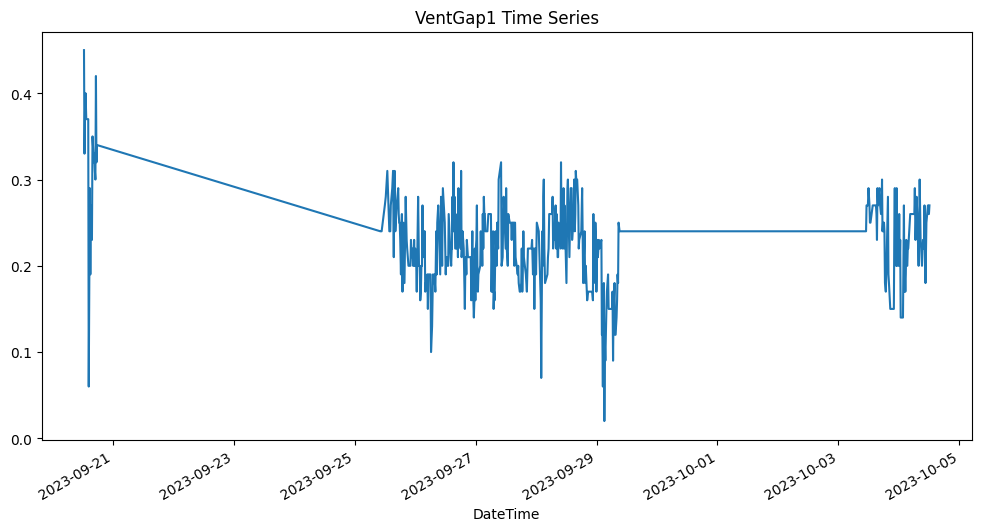

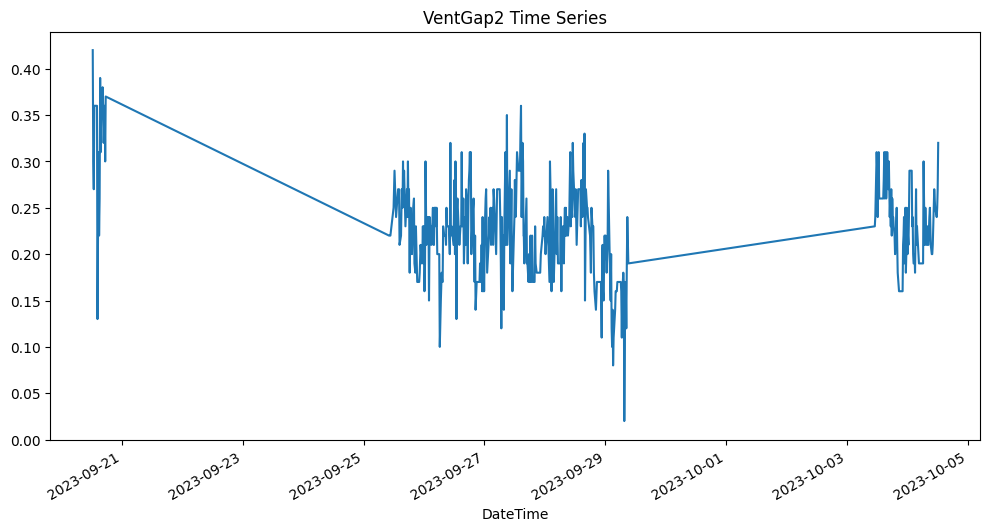

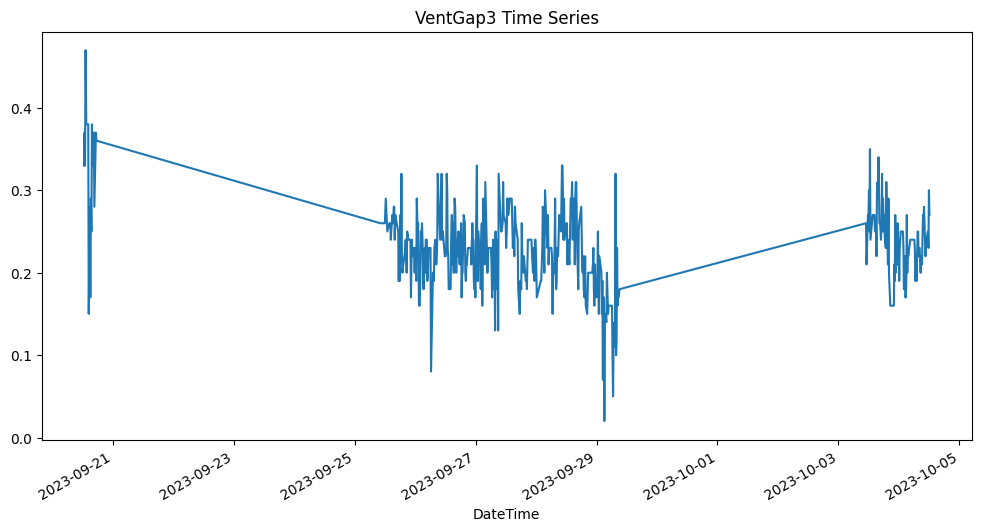

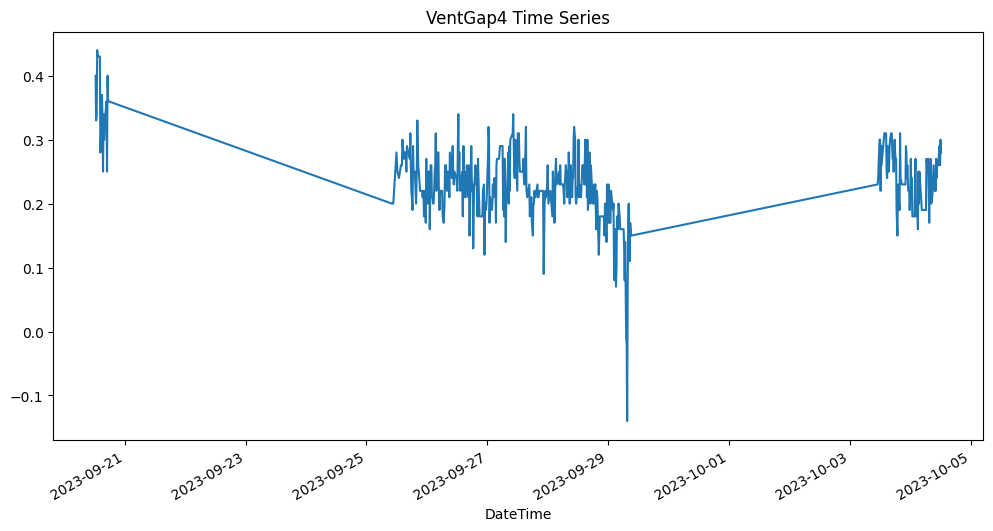

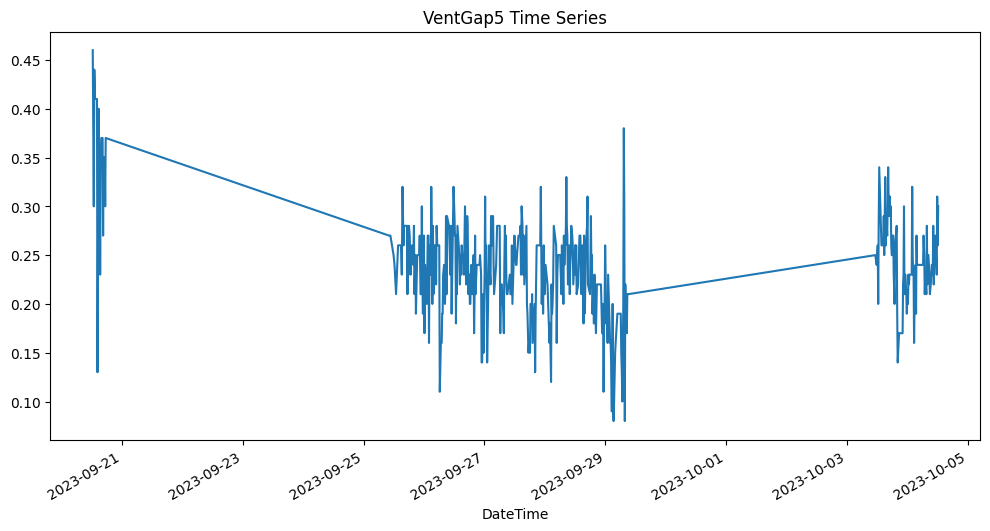

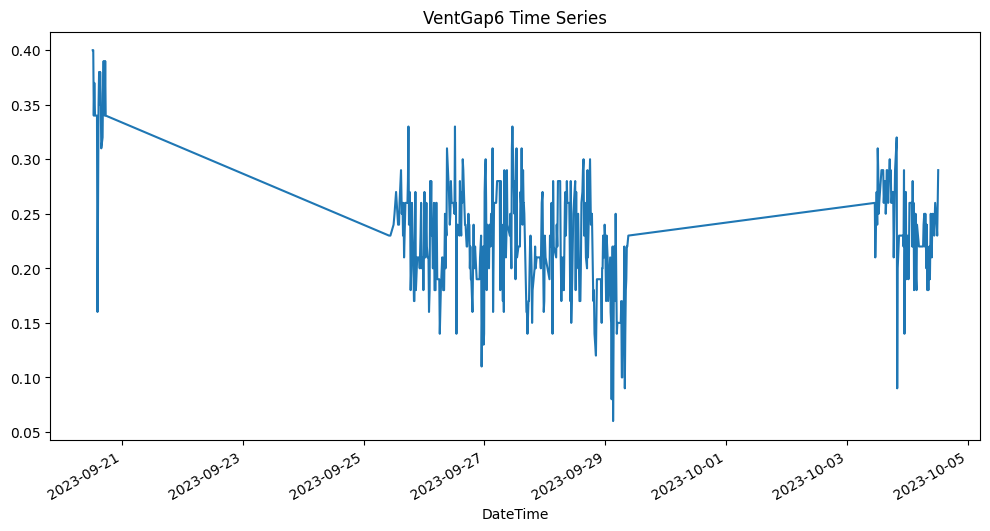

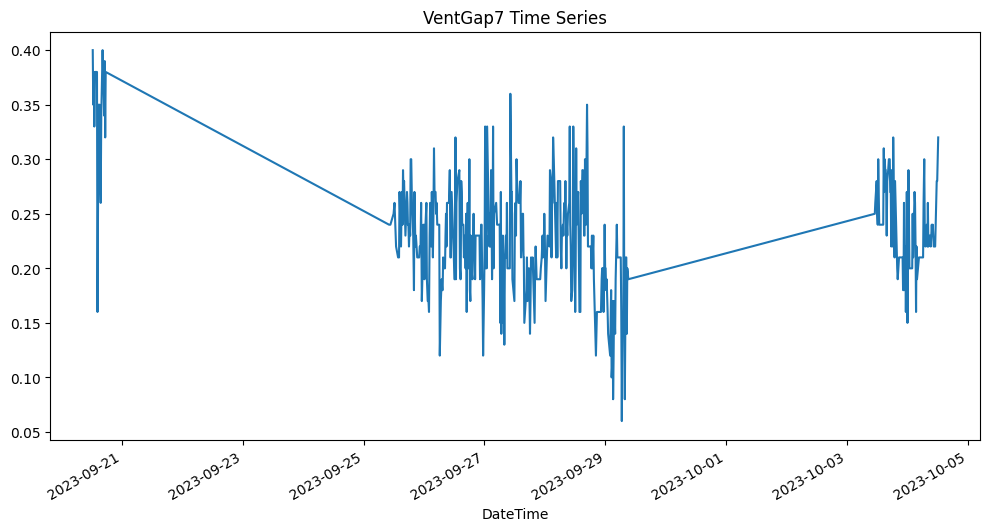

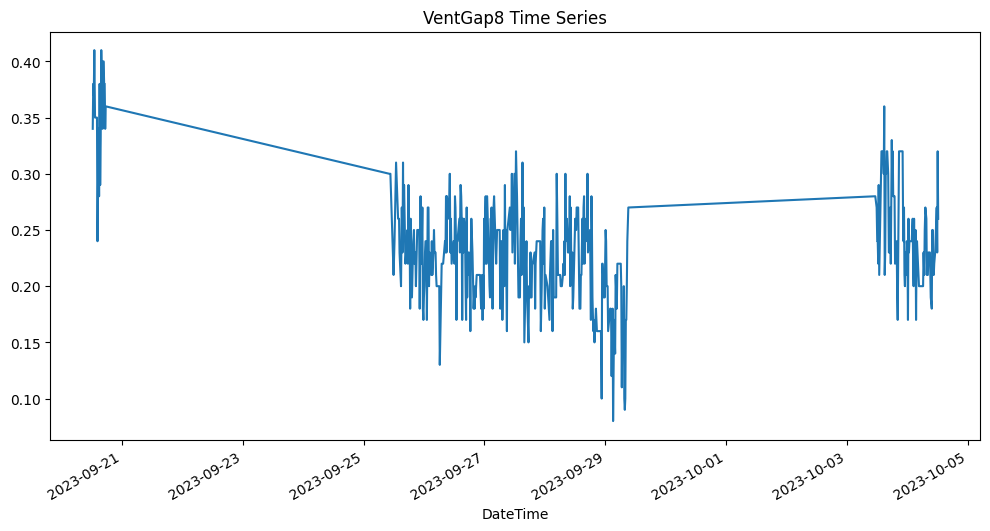

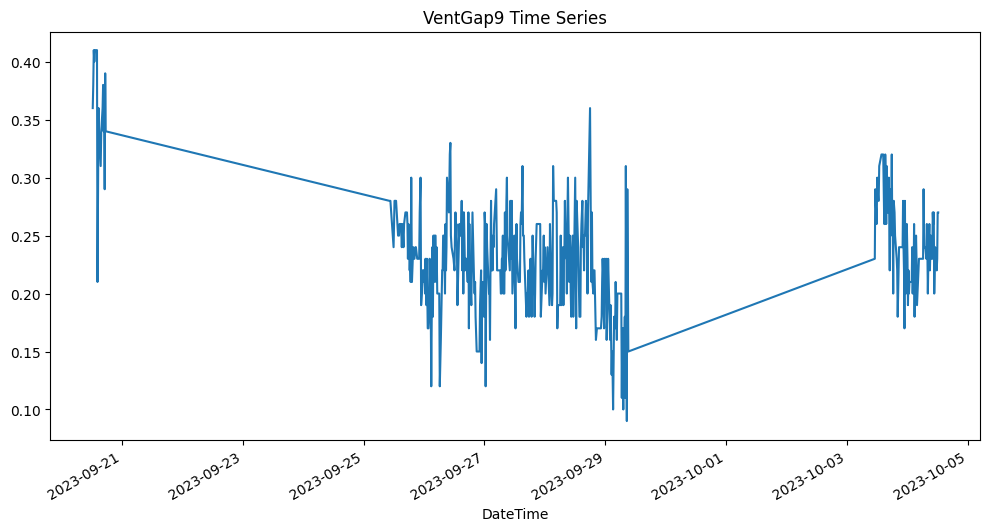

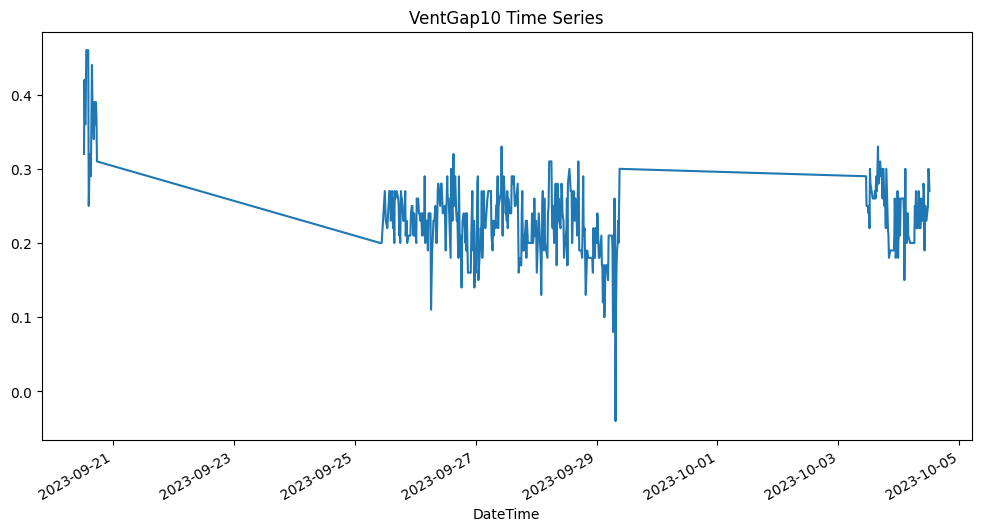

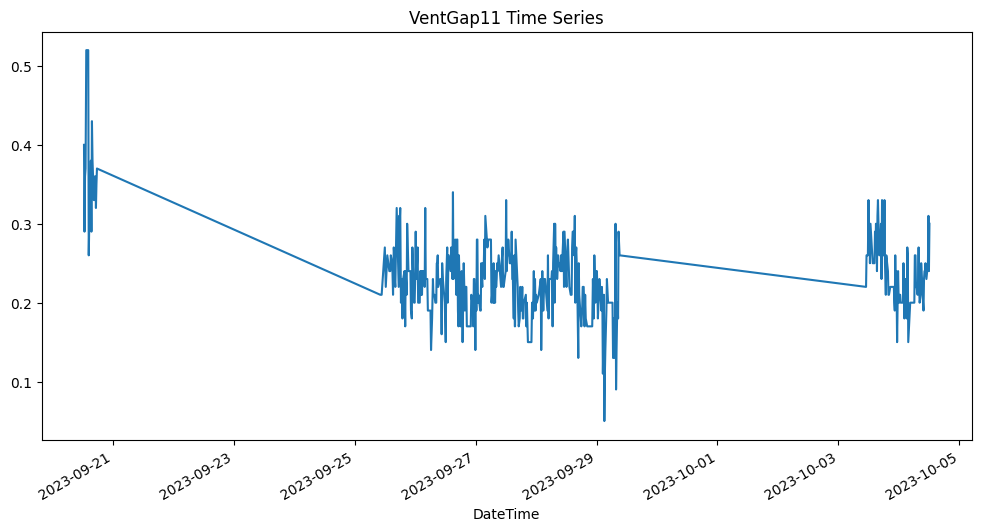

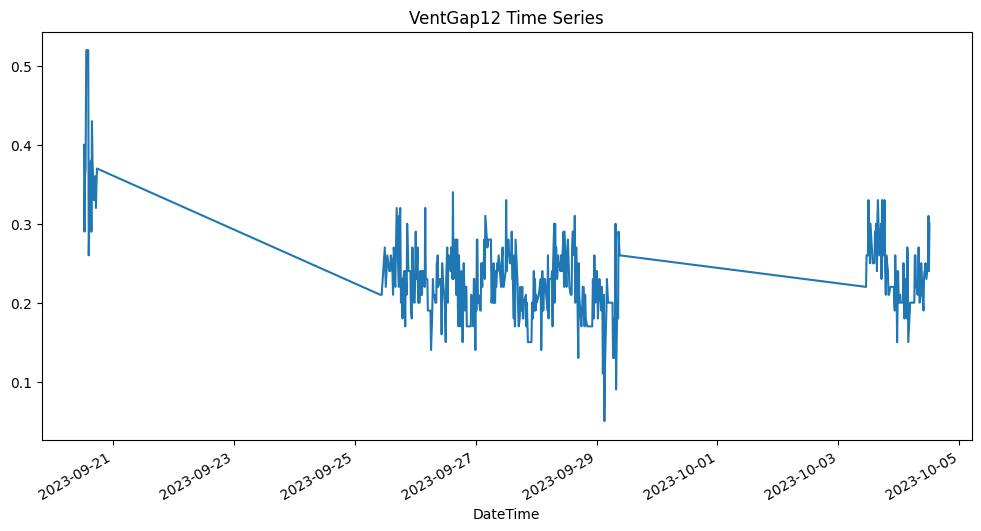

In [ ]:
for cycle in range(1, 13):
    column_name = f'VentGap{cycle}'
    data[column_name].plot(figsize=(12, 6))
    plt.title(f'{column_name} Time Series')
    plt.show()

In [ ]:
!pip install pandas scikit-learn xgboost


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming 'TargetColumn' is the target variable you want to predict
# Replace it with the actual target variable in your dataset
target_column = 'FertCode'

# Selecting features and target variable
features = [ 'VentGap1', 'VentGap2', 'VentGap3', 'VentGap4', 'VentGap5', 'VentGap6', 'VentGap7', 'VentGap8', 'VentGap9', 'VentGap10', 'VentGap11', 'VentGap12', 'VentGap13', 'PrVent1', 'PrVent2', 'PrVent3', 'PrVent4', 'PrVent5', 'PrVent6', 'PrVent7', 'PrVent8', 'PrVent9', 'PrVent10', 'PrVent11', 'PrVent12', 'PrVent13', 'RelPrVent1', 'RelPrVent2', 'RelPrVent3', 'RelPrVent4', 'RelPrVent5', 'RelPrVent6', 'RelPrVent7', 'RelPrVent8', 'RelPrVent9', 'RelPrVent10', 'RelPrVent11', 'RelPrVent12', 'RelPrVent13']
X = data[features]
y = data[target_column]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an XGBoost regressor
model = xgb.XGBRegressor(objective ='reg:squarederror')

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Printing predictions for each specified column
for column in features:
    print(f"Predictions for {column}:")
    print((data[[column]]))
    print()

# Calculate Mean Squared Error for the current column
next_values = model.predict(data[features])
mse = mean_squared_error(y, next_values)
print(f"MSE for {column}: {mse}")
print()



Predictions for VentGap1:
1                        VentGap1
DateTime                         
2023-09-20 12:29:19.330      0.45
2023-09-20 12:41:29.553      0.33
2023-09-20 12:53:55.987      0.38
2023-09-20 13:06:50.047      0.40
2023-09-20 13:23:33.447      0.37
...                           ...
2023-10-04 10:56:39.200      0.25
2023-10-04 11:33:30.633      0.27
2023-10-04 11:45:10.173      0.26
2023-10-04 11:56:34.307      0.26
2023-10-04 12:08:59.747      0.27

[429 rows x 1 columns]

Predictions for VentGap2:
1                        VentGap2
DateTime                         
2023-09-20 12:29:19.330      0.42
2023-09-20 12:41:29.553      0.30
2023-09-20 12:53:55.987      0.27
2023-09-20 13:06:50.047      0.36
2023-09-20 13:23:33.447      0.36
...                           ...
2023-10-04 10:56:39.200      0.25
2023-10-04 11:33:30.633      0.24
2023-10-04 11:45:10.173      0.25
2023-10-04 11:56:34.307      0.27
2023-10-04 12:08:59.747      0.32

[429 rows x 1 columns]

Predictions fo